In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Import các thư viện cần thiết**

In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**2. Đọc file dữ liệu GAS và chia dataset theo tỉ lệ 6:3:1**

In [24]:
# Đọc file dữ liệu
df = pd.read_csv('/content/drive/MyDrive/PTTK/MBB.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Use the correct format
df.set_index('Date', inplace=True)
df = df.dropna() # Drop missing values



In [25]:
# Split the data into training, testing
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df))

train_data73 = df[:train_size73]
test_data73 = df[train_size73:train_size73+test_size73]
# Split the data into training, testing
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df))

train_data82 = df[:train_size82]
test_data82 = df[train_size82:train_size82+test_size82]
# Split the data into training, testing
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df))

train_data91 = df[:train_size91]
test_data91 = df[train_size91:train_size91+test_size91]

**Xem** **lại** **dataset**

In [26]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-05,4894.0,4894.0,4964.0,4894.0,1.07M,0.0
2016-01-06,4929.0,4894.0,4929.0,4894.0,670.50K,0.0
2016-01-07,4859.0,4929.0,4929.0,4859.0,1.61M,0.0
2016-01-08,4824.0,4824.0,4859.0,4789.0,1.73M,0.0
2016-01-11,4789.0,4824.0,4859.0,4789.0,1.12M,0.0
...,...,...,...,...,...,...
2023-12-21,18150.0,18100.0,18150.0,18000.0,3.98M,0.0
2023-12-22,18300.0,18150.0,18450.0,18100.0,8.55M,0.0
2023-12-25,18400.0,18350.0,18550.0,18300.0,6.59M,0.0


**3. Dùng model ARIMA để train data**

In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [27]:
# Quá trình Training
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19312.424, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19314.826, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19312.615, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19313.085, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19317.538, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19311.457, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19310.243, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=19311.916, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19309.869, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19311.325, Time=0.84 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19309.747, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=19311.519, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19313.273, Time=1.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=19312.390, Time=0.10 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [28]:
# Quá trình Training
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22612.089, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22613.746, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22613.734, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22612.631, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22615.489, Time=2.49 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.344 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [29]:
# Quá trình Training
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25738.759, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25740.755, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25740.759, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25737.700, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25742.746, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.538 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**4. Quá trình test**

In [30]:
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73),typ='levels', dynamic=True)

x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82),typ='levels', dynamic=True)

x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91),typ='levels', dynamic=True)

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [31]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model73.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df73 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df73)


Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28     24751.973912
2023-12-29     24746.617754
2023-12-30     24763.626690
2023-12-31     24776.570325
2024-01-01     24791.043146
2024-01-02     24805.197168
2024-01-03     24819.457857
2024-01-04     24833.694230
2024-01-05     24847.938152
2024-01-06     24862.180249
2024-01-07     24876.422885
2024-01-08     24890.665386
2024-01-09     24904.907926
2024-01-10     24919.150456
2024-01-11     24933.392989
2024-01-12     24947.635521
2024-01-13     24961.878053
2024-01-14     24976.120585
2024-01-15     24990.363117
2024-01-16     25004.605650
2024-01-17     25018.848182
2024-01-18     25033.090714
2024-01-19     25047.333246
2024-01-20     25061.575778
2024-01-21     25075.818310
2024-01-22     25090.060842
2024-01-23     25104.303375
2024-01-24     25118.545907
2024-01-25     25132.788439
2024-01-26     25147.030971


In [32]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model82.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df82 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df82)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28     23344.560502
2023-12-29     23356.121003
2023-12-30     23367.681505
2023-12-31     23379.242006
2024-01-01     23390.802508
2024-01-02     23402.363009
2024-01-03     23413.923511
2024-01-04     23425.484013
2024-01-05     23437.044514
2024-01-06     23448.605016
2024-01-07     23460.165517
2024-01-08     23471.726019
2024-01-09     23483.286520
2024-01-10     23494.847022
2024-01-11     23506.407524
2024-01-12     23517.968025
2024-01-13     23529.528527
2024-01-14     23541.089028
2024-01-15     23552.649530
2024-01-16     23564.210031
2024-01-17     23575.770533
2024-01-18     23587.331034
2024-01-19     23598.891536
2024-01-20     23610.452038
2024-01-21     23622.012539
2024-01-22     23633.573041
2024-01-23     23645.133542
2024-01-24     23656.694044
2024-01-25     23668.254545
2024-01-26     23679.815047


In [33]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model91.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df91 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df91)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28          17800.0
2023-12-29          17800.0
2023-12-30          17800.0
2023-12-31          17800.0
2024-01-01          17800.0
2024-01-02          17800.0
2024-01-03          17800.0
2024-01-04          17800.0
2024-01-05          17800.0
2024-01-06          17800.0
2024-01-07          17800.0
2024-01-08          17800.0
2024-01-09          17800.0
2024-01-10          17800.0
2024-01-11          17800.0
2024-01-12          17800.0
2024-01-13          17800.0
2024-01-14          17800.0
2024-01-15          17800.0
2024-01-16          17800.0
2024-01-17          17800.0
2024-01-18          17800.0
2024-01-19          17800.0
2024-01-20          17800.0
2024-01-21          17800.0
2024-01-22          17800.0
2024-01-23          17800.0
2024-01-24          17800.0
2024-01-25          17800.0
2024-01-26          17800.0


***7.Đánh giá độ chính xác thuật toán***

In [34]:
from sklearn.metrics import mean_squared_log_error as msle

In [35]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred73 - y_test73)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test73 - y_pred73) / y_test73)) * 100
print('Testing MAPE:', test_mape)

#MLSE
test_msle = msle(y_test73, y_pred73)
print('Testing MAE:', test_msle)

Testing RMSE: 9682.51350141362
Testing MAPE: 43.58588976897108
Testing MAE: 0.16149182167356546


In [36]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred82 - y_test82)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test82 - y_pred82) / y_test82)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test82, y_pred82)
print('Testing MAE:', test_msle)

Testing RMSE: 7136.268383387428
Testing MAPE: 36.166399185489034
Testing MAE: 0.10605406341514417


In [37]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred91 - y_test91)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test91 - y_pred91) / y_test91)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test91, y_pred91)
print('Testing MAE:', test_msle)

Testing RMSE: 1139.4762175013818
Testing MAPE: 4.570054539884644
Testing MAE: 0.0036918444253845376


**8. Vẽ biểu đồ**

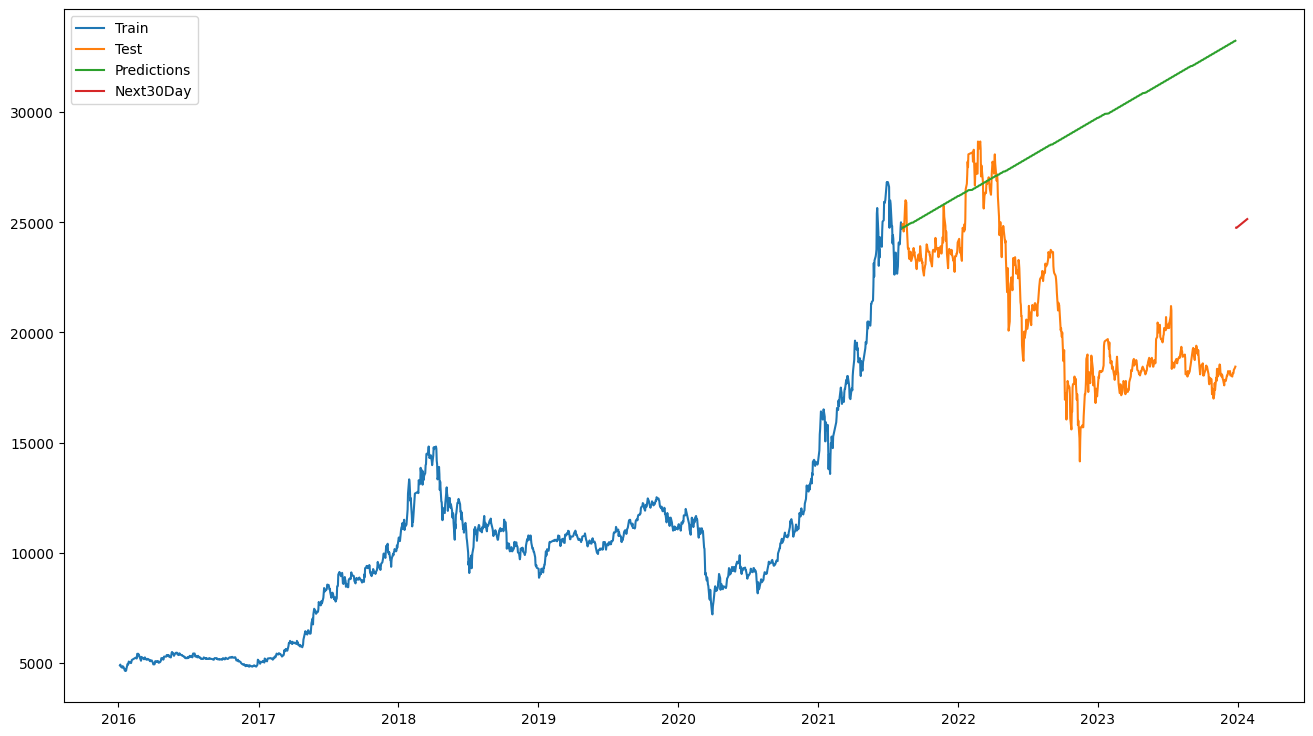

In [38]:
plt.figure(figsize=(16, 9))
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df73.index, predictions_df73['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


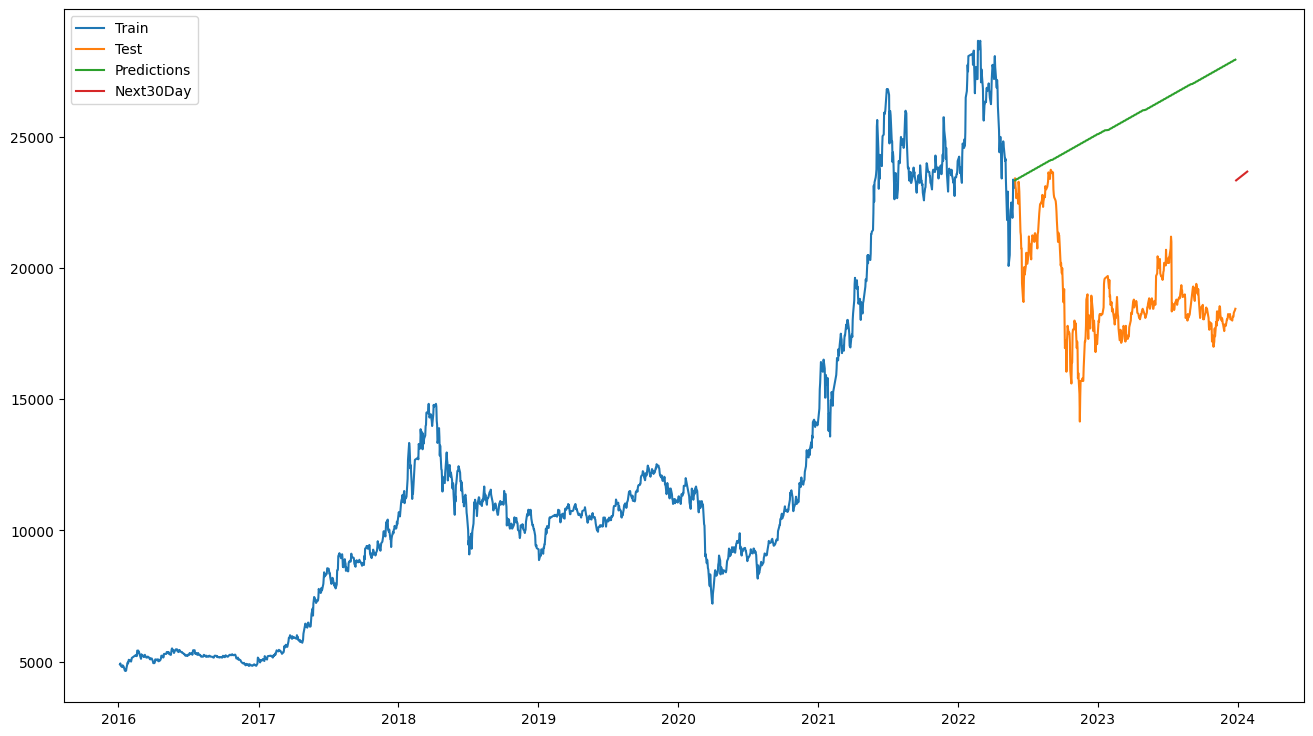

In [39]:
plt.figure(figsize=(16, 9))
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df82.index, predictions_df82['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


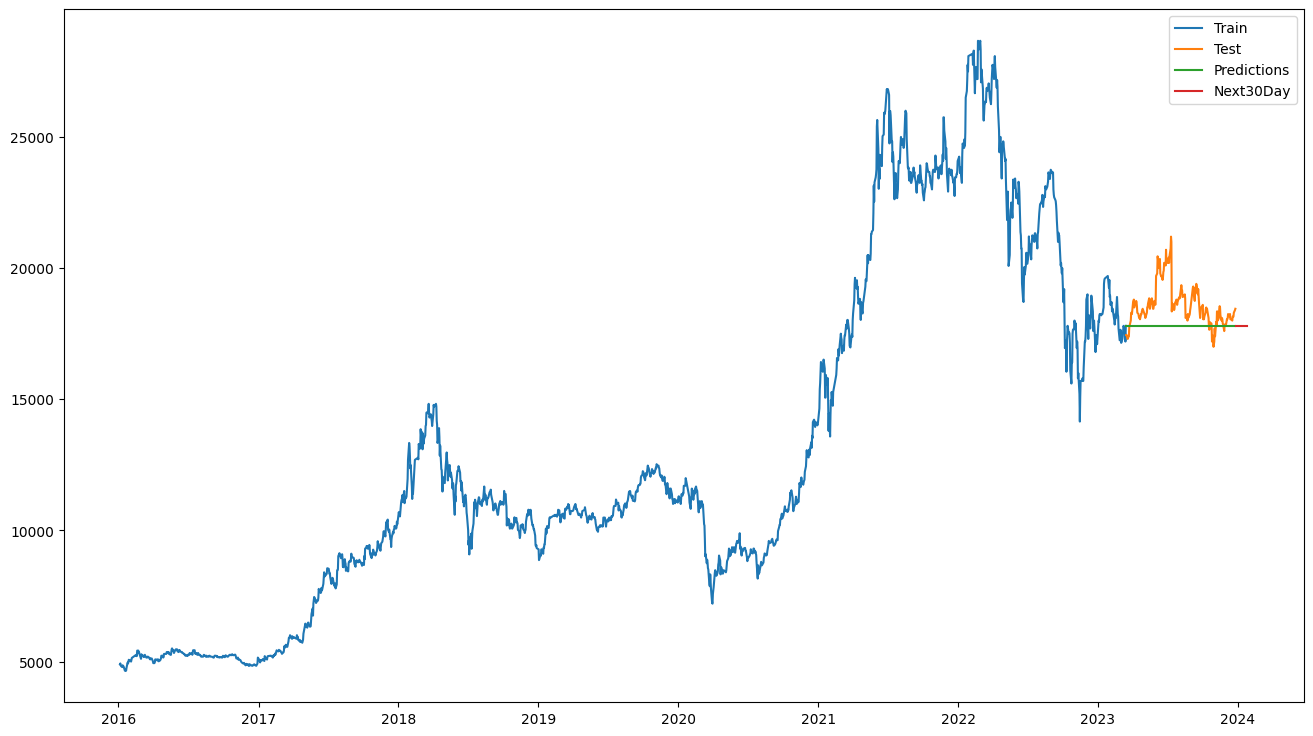

In [40]:
plt.figure(figsize=(16, 9))
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df91.index, predictions_df91['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()
